In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, 
                             roc_auc_score, f1_score, recall_score, roc_curve, auc)
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import shap

In [2]:
df = pd.read_csv("C:\\Users\\Suvha\\Downloads\\survey lung cancer.csv")
df.columns = df.columns.str.strip() 
df = df.drop_duplicates()

In [3]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,F,59,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
280,F,59,2,1,1,1,2,2,2,1,1,1,2,1,1,NO
281,M,55,2,1,1,1,1,2,2,1,1,1,2,1,2,NO
282,M,46,1,2,2,1,1,1,1,1,1,1,1,2,2,NO


In [4]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

C:\Users\Suvha\AppData\Local\Temp\ipykernel_9248\3834895749.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=target_counts.index, y=target_counts.values, palette="Reds_r")


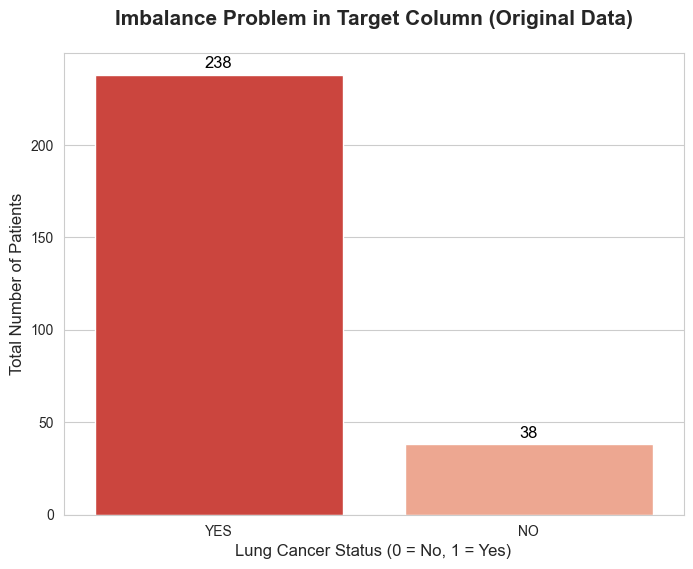

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ১. ডাটা সেটআপ 
target_counts = df['LUNG_CANCER'].value_counts()

# ২. ভিজ্যুয়ালাইজেশন
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
ax = sns.barplot(x=target_counts.index, y=target_counts.values, palette="Reds_r")


plt.title('Imbalance Problem in Target Column (Original Data)', fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Lung Cancer Status (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Total Number of Patients', fontsize=12)


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

In [6]:
le = LabelEncoder()
df['GENDER'] = le.fit_transform(df['GENDER'])
df['LUNG_CANCER'] = le.fit_transform(df['LUNG_CANCER'])

X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

In [7]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

C:\Users\Suvha\AppData\Local\Temp\ipykernel_9248\2462236101.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=balanced_counts.index, y=balanced_counts.values, palette="Greens_r")


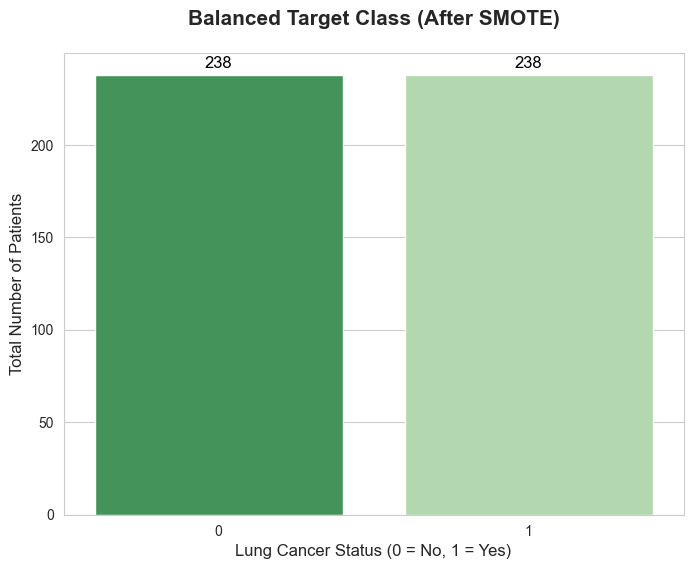

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# ১. SMOTE প্রয়োগ করা 
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# ২. রিস্যাম্পল করা ডাটার কাউন্ট বের করা
balanced_counts = pd.Series(y_res).value_counts()

# ৩. ভিজ্যুয়ালাইজেশন
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=balanced_counts.index, y=balanced_counts.values, palette="Greens_r")

# ৪. চার্টের সৌন্দর্য এবং টাইটেল
plt.title('Balanced Target Class (After SMOTE)', fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Lung Cancer Status (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Total Number of Patients', fontsize=12)


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_res, test_size=0.15, random_state=42, stratify=y_res)

In [9]:
def build_model():
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(128, activation='swish'), 
        BatchNormalization(),
        Dropout(0.4),
        Dense(64, activation='swish'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='swish'),
        Dense(1, activation='sigmoid')
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = build_model()

In [10]:
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)


In [11]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=200, batch_size=32, 
                    callbacks=[early_stop, reduce_lr], verbose=0)

In [12]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = recall_score(y_test, y_pred)
specificity = tn / (tn + fp)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("\n" + "="*40)
print("       LCP-XNet Final Results")
print("="*40)
print(f"Accuracy    : {accuracy_score(y_test, y_pred)*100:.2f}%")
print(f"Sensitivity : {sensitivity*100:.2f}%")
print(f"Specificity : {specificity*100:.2f}%")
print(f"ROC-AUC     : {roc_auc:.4f}")
print("="*40)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step

       LCP-XNet Final Results
Accuracy    : 97.22%
Sensitivity : 97.22%
Specificity : 97.22%
ROC-AUC     : 0.9815


In [13]:
print(y_pred)

[[1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]


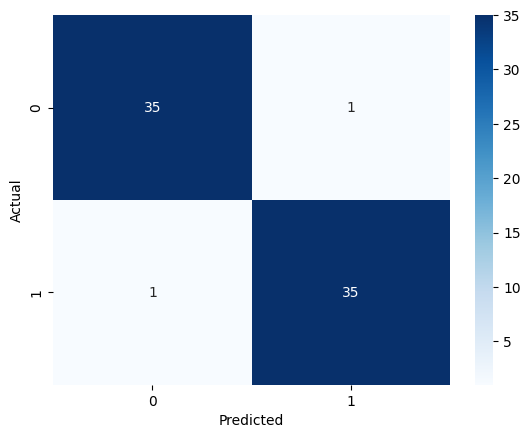

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


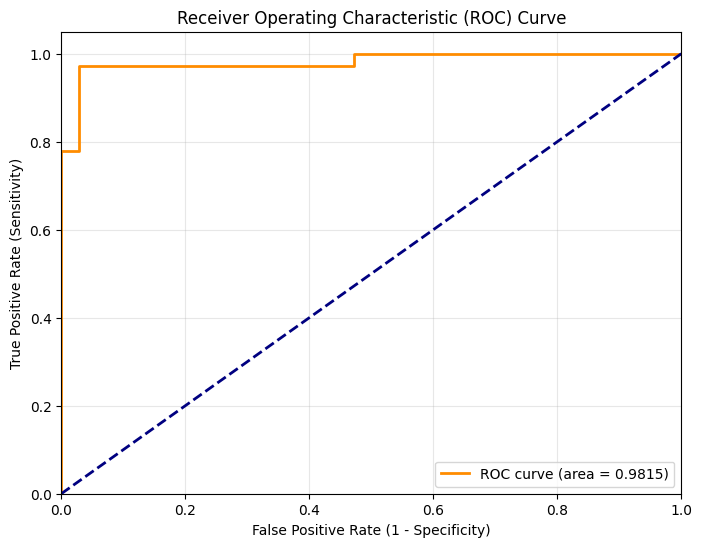

In [15]:


y_pred_prob = model.predict(X_test).ravel() 


from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1299/1299 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step

[INFO] Generating Global Plot...


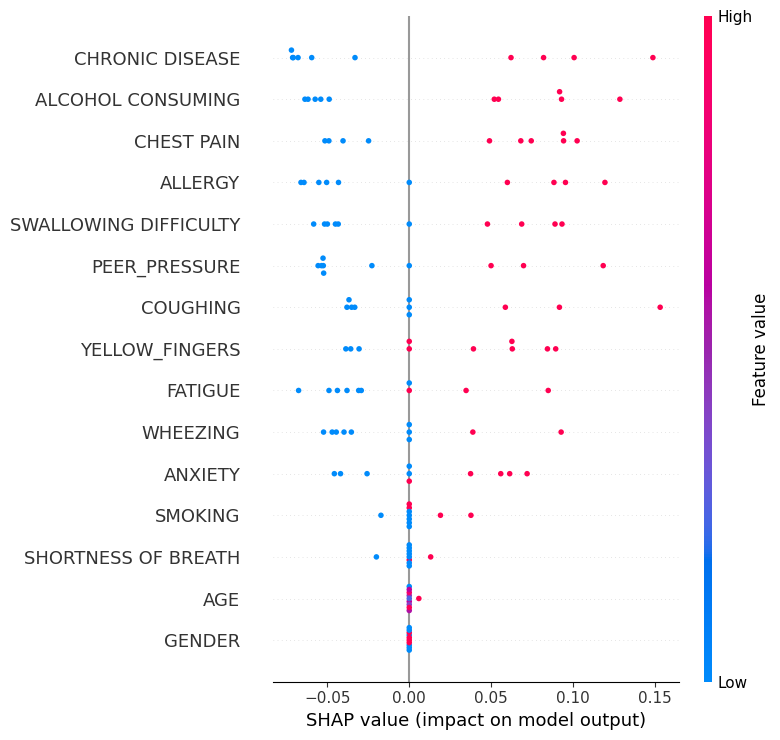


[INFO] Generating Local Waterfall Plot...


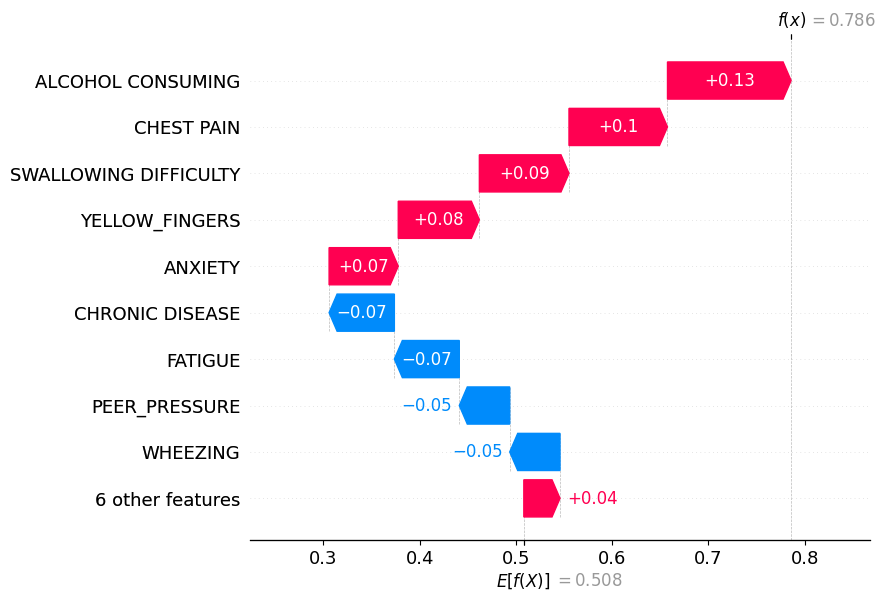

In [ ]:


import numpy as np


background = shap.sample(X_train, 20) 
test_samples = X_test[:10] 


predict_fn = lambda x: model.predict(x).flatten()


explainer = shap.KernelExplainer(predict_fn, background)



shap_values = explainer.shap_values(test_samples)


if len(shap_values.shape) > 2:
    shap_values_to_plot = shap_values[..., 0]
else:
    shap_values_to_plot = shap_values

print("\n[INFO] Generating Global Plot...")


plt.figure(figsize=(10,6))
shap.summary_plot(shap_values_to_plot, test_samples, feature_names=X.columns, show=True)


print("\n[INFO] Generating Local Waterfall Plot...")
plt.figure(figsize=(12,8))
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, 
                                        shap_values_to_plot[0], 
                                        feature_names=X.columns)
plt.show()